<a href="https://colab.research.google.com/github/EAFIT-BI/Supervised-Learning-2025-I/blob/main/Notebook_LSTM_Series_Temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicción de Series Temporales Financieras con Redes Neuronales

Este notebook explora la predicción de series temporales financieras usando modelos tradicionales y de deep learning.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

plt.style.use('fivethirtyeight')


In [ ]:

# Descargar datos del SP500
df = yf.download('^GSPC', start='2015-01-01', end='2024-12-31')
df = df[['Close']]
df.dropna(inplace=True)
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,^GSPC
Date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893


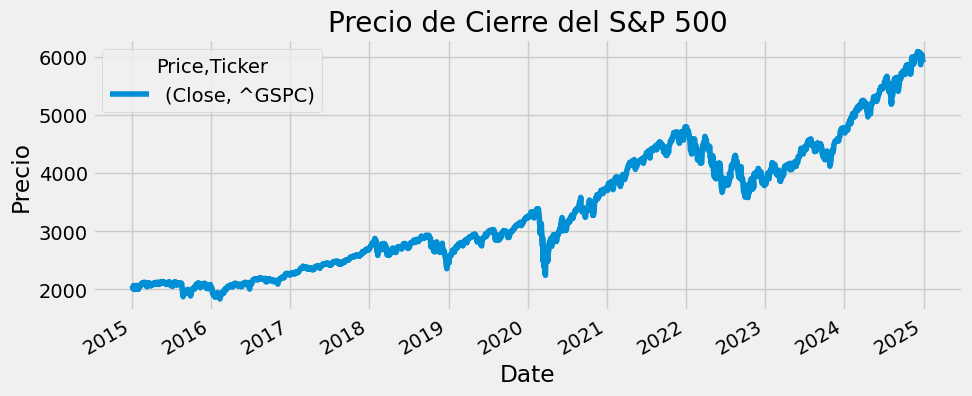

In [ ]:

df.plot(figsize=(10, 4), title='Precio de Cierre del S&P 500')
plt.ylabel('Precio')
plt.show()


In [ ]:

# Normalizar
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Dividir en train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (1964, 60, 1), X_test shape: (491, 60, 1)


In [ ]:

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0321 - val_loss: 0.0011
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.2978e-04 - val_loss: 9.9307e-04
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.9448e-04 - val_loss: 0.0011
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.7910e-04 - val_loss: 8.0831e-04
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0822e-04 - val_loss: 9.5990e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4301e-04 - val_loss: 7.6289e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 2.2885e-04 - val_loss: 7.1743e-04
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.3049e-04 - val_loss: 0.0011
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2351e-04 - val_loss: 6.7882e-04
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.5205e-04 - val_loss: 7.4037e-04


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Mean Absolute Error: 73.82


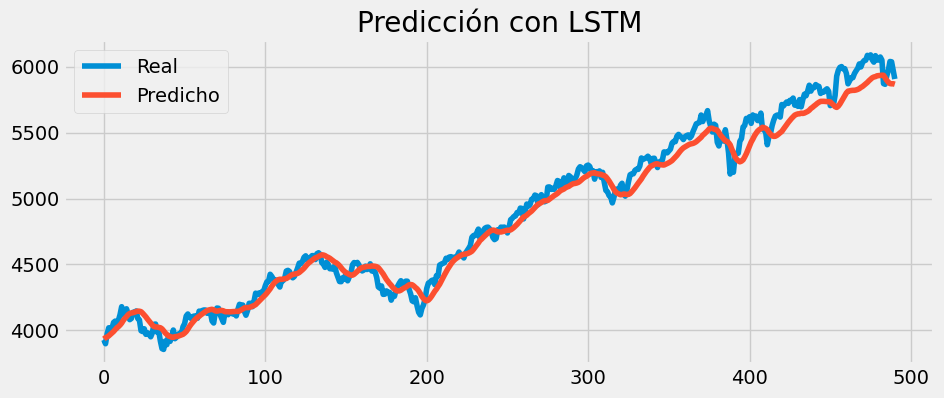

In [ ]:

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test_rescaled, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# Graficar resultados
plt.figure(figsize=(10, 4))
plt.plot(y_test_rescaled, label='Real')
plt.plot(predictions, label='Predicho')
plt.title('Predicción con LSTM')
plt.legend()
plt.show()
